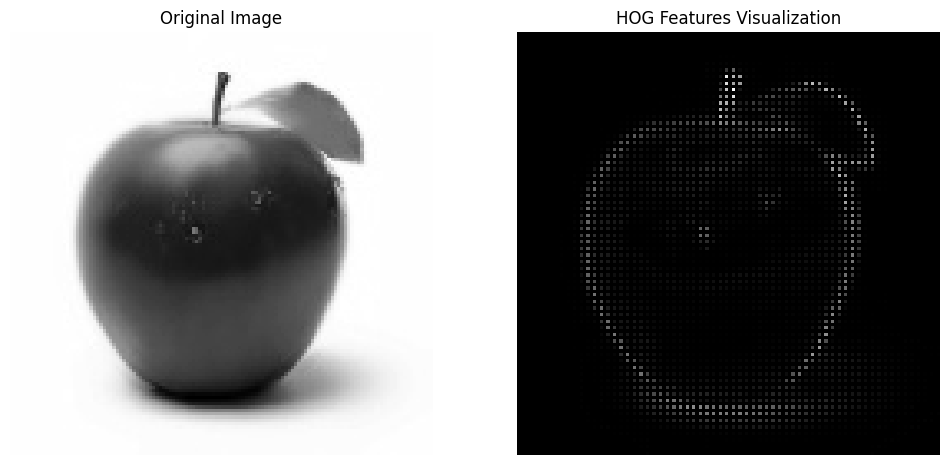

In [1]:
import matplotlib.pyplot as plt
from skimage import data, color, exposure
from skimage.feature import hog
from skimage.io import imread

# Load image (replace with your own image path)
image = imread('../images/apple_2.jpg')

if image.shape[2] == 4:
    image = color.rgba2rgb(image)  # drops alpha channel, converts to RGB
image = color.rgb2gray(image)  # then convert to grayscale

# Compute HOG features and get the HOG image for visualization
features, hog_image = hog(image,
                          orientations=9,
                          pixels_per_cell=(2, 2),
                          cells_per_block=(2, 2),
                          block_norm='L2-Hys',
                          visualize=True)

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Plot original and HOG visualization side-by-side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

ax1.imshow(image, cmap='gray')
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(hog_image_rescaled, cmap='gray')
ax2.set_title('HOG Features Visualization')
ax2.axis('off')

plt.show()
